# **Import Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score


# **Load Dataset**

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# **Normalise Dataset**

In [3]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# **Reshape Data**

In [4]:
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# **One-Hot Encode Labels**

In [5]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# **Hyperparameter Tuning**

In [6]:
best_accuracy = 0
best_params = {}

# Hyperparameter options
batch_sizes = [64, 128]
epochs = [10, 20]
dropout_rates = [0.2, 0.3]

In [7]:

for batch_size in batch_sizes:
    for epoch in epochs:
        for dropout_rate in dropout_rates:
            # **Neural Network Model**
            model = models.Sequential()
            model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
            model.add(layers.Dropout(dropout_rate))
            model.add(layers.Dense(256, activation='relu'))
            model.add(layers.Dropout(dropout_rate))
            model.add(layers.Dense(10, activation='softmax'))

            # Compiling model
            model.compile(optimizer='adam',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

            # Model training
            model.fit(x_train, y_train, epochs=epoch, batch_size=batch_size, validation_split=0.3, verbose=0)

            # Evaluate model
            predictions = model.predict(x_test)
            predicted_labels = np.argmax(predictions, axis=1)
            true_labels = np.argmax(y_test, axis=1)
            accuracy = accuracy_score(true_labels, predicted_labels)

            # Update best parameters if current model is better
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {
                    'batch_size': batch_size,
                    'epochs': epoch,
                    'dropout_rate': dropout_rate
                }


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [8]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,607,456 (6.13 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,071,638 (4.09 MB)

In [9]:
# Print best parameters to use
print(f"Best Accuracy: {best_accuracy * 100:.2f}%")
print(f"Best Parameters: {best_params}")

Best Accuracy: 98.18%
Best Parameters: {'batch_size': 128, 'epochs': 20, 'dropout_rate': 0.3}


In [10]:
# try again with final Model with Best Hyperparameters
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dropout(best_params['dropout_rate']))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(best_params['dropout_rate']))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Train final model
history = model.fit(x_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], validation_split=0.3)

Epoch 1/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.8194 - loss: 0.5985 - val_accuracy: 0.9548 - val_loss: 0.1484
Epoch 2/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9528 - loss: 0.1560 - val_accuracy: 0.9612 - val_loss: 0.1251
Epoch 3/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9684 - loss: 0.1020 - val_accuracy: 0.9695 - val_loss: 0.1008
Epoch 4/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9745 - loss: 0.0825 - val_accuracy: 0.9706 - val_loss: 0.0980
Epoch 5/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9792 - loss: 0.0665 - val_accuracy: 0.9747 - val_loss: 0.0906
Epoch 6/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9823 - loss: 0.0546 - val_accuracy: 0.9773 - val_loss: 0.0833
Epoch 7/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9840 - loss: 0.0481 - val_accuracy: 0.9762 - val_loss: 0.0844
Epoch 8/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9860 - loss: 0.0439 - val

In [13]:
# Model Evaluation and Visualization
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [14]:
# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
precision = precision_score(true_labels, predicted_labels, average='weighted')

# Print results
print(f"Final Model Accuracy: {accuracy * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}')

Final Model Accuracy: 98.12%
Recall: 98.12%
Precision: 98.12%
F1-Score: 98.12%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9775 - loss: 0.1006
Test Accuracy: 0.9811999797821045


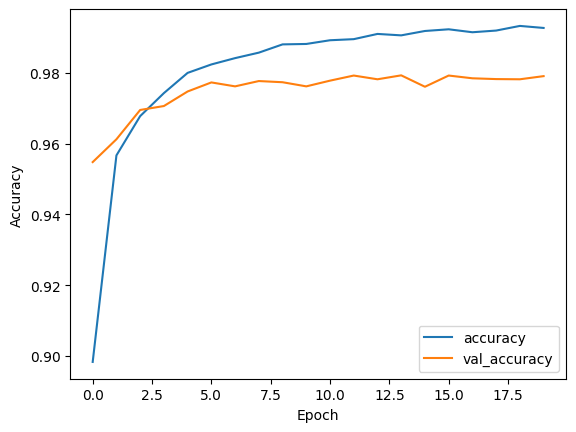

In [15]:
# Visualizing Accuracy and Loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


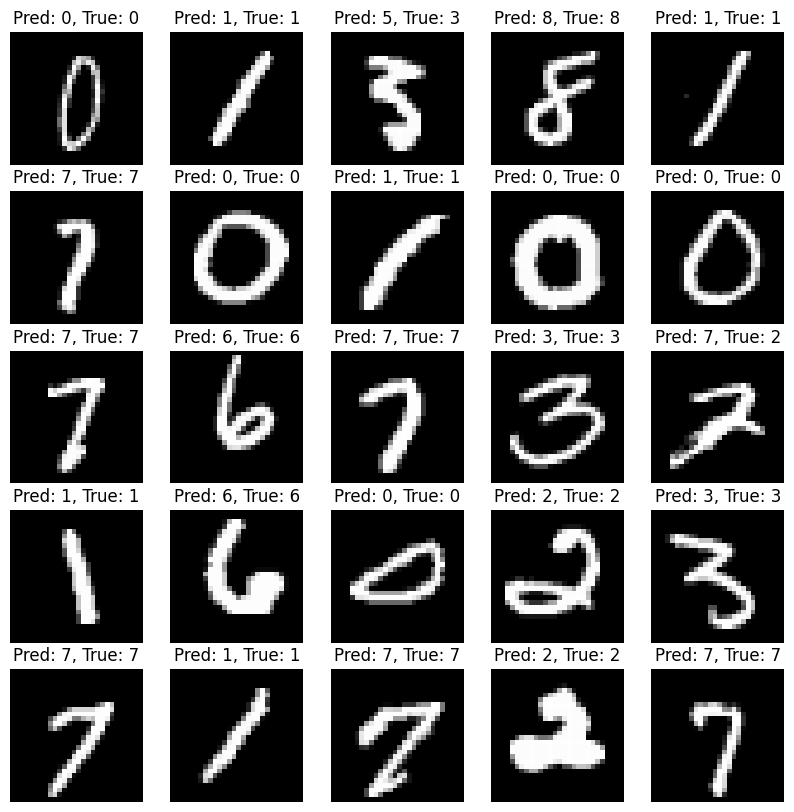

In [16]:
# Number of predictions to visualize and test the model's prediction
num_images = 25

# Select random indices from the test set
indices = np.random.choice(range(len(x_test)), num_images, replace=False)

# Plot the images with their predicted and true labels
plt.figure(figsize=(10, 10))
for i, idx in enumerate(indices):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[idx]}, True: {true_labels[idx]}")
    plt.axis('off')

plt.show()